# Feature Extract

In [1]:
from mylibs.datautils import read_navy_origin_data, parse_record_signal_file
from mylibs.utils import show_signal, show_signal_freqency
from mylibs.signal_preprocess import cut_head, PDS_signal_extract, PWS_signal_extract
from mylibs.features_extracts import exponent, get_pds_features, get_pws_features, get_temperature_features
import matplotlib.pyplot as plt
import math
import numpy as np


NAVY_DATAPATH = '/root/hdd/datasets/navy_glucose'

## Observe Signals

In [2]:
pinfos_frame, pmeta_frame = read_navy_origin_data(NAVY_DATAPATH)

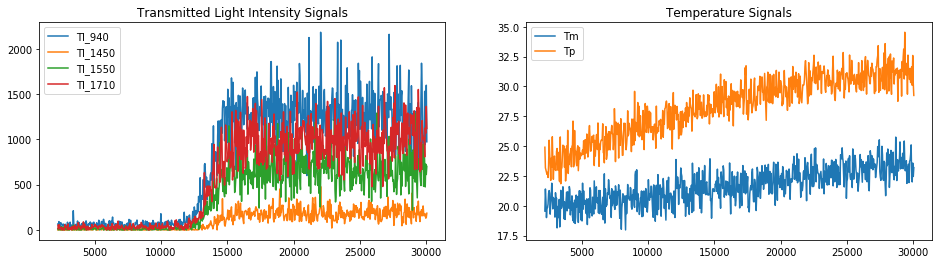

[1.12000000e+03 2.04073538e+04 2.04028980e+04 2.04022046e+04
 2.04005620e+04 2.03120404e+01 2.29594537e+01]


In [3]:
# load an example signal
example_idx = 37   # 34, 37 is best
bgc_example, r_time_example, signal_example = parse_record_signal_file(
    pmeta_frame.loc[example_idx, 'signal_url(s)'])
signal_cut_example, incident_intensity = cut_head(signal_example)

# show the example signal
plt.figure(figsize=(16, 4))
show_signal(signal_cut_example)
plt.show()
print(incident_intensity)

## Features from PDS

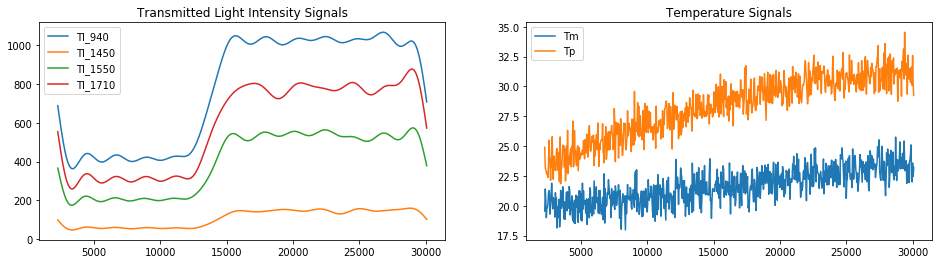

In [4]:
pds_example, _ = PDS_signal_extract(signal_cut_example)

plt.figure(figsize=(16, 4))
show_signal(pds_example)
plt.show()

In [5]:
# extract pds features
pds_features = get_pds_features(pds_example, incident_intensity)
print(pds_features)

{'mLpA': array([3.88693629, 5.89160366, 4.6006667 , 4.18597192]), 'mHpA': array([2.98460863, 4.93314504, 3.63720876, 3.27005794]), 'MpA': array([2.96981454, 4.97049136, 3.62307182, 3.29543815]), 'mRpA': array([0.90232766, 0.95845862, 0.96345794, 0.91591399])}


## Features from PWS

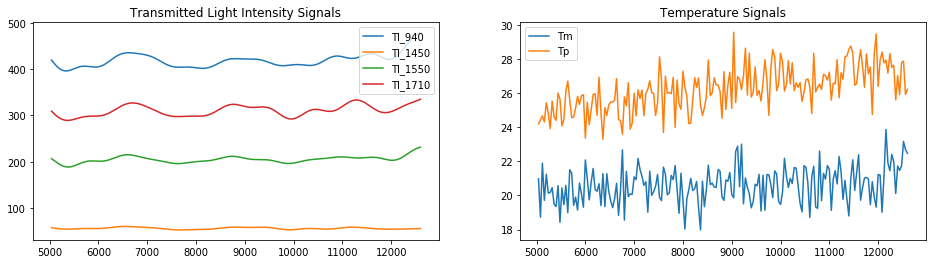

In [6]:
pws_example, _ = PWS_signal_extract(signal_cut_example, AC=[1, 1.5])

plt.figure(figsize=(16, 4))
show_signal(pws_example)
plt.show()

In [7]:
# extract pws features
pws_features = get_pws_features(pws_example, incident_intensity)
print(pws_features)

{'mEvA': array([3.92121462, 5.9337096 , 4.62916714, 4.22671431]), 'mCvA': array([3.86275563, 5.83279002, 4.56083636, 4.13903675]), 'mRvA': array([0.05845899, 0.10091959, 0.06833078, 0.08767756]), 'ma': array([24.38283432,  5.74210644, 14.083107  , 27.29590855]), 'mf': 0.8378378378378378}


## Features from Temperatures

/root/ssd/workspace/projects/physique_based_ngm/mylibs/features_extracts.py:115: RuntimeWarning: overflow encountered in multiply
  y = k * np.exp(-tao * x) + beta


{'Tm_init': 25, 'Tear': 34.148632467453844, 'Tao_p': 5.105899211796868e-05}
{'k_p': -12.334635302183296, 'tao_p': 5.105899211796868e-05, 'beta_p': 34.148632467453844, 'k_m': -16878.101968175943, 'tao_m': 8.200575853826243e-09, 'beta_m': 16897.5049582104}


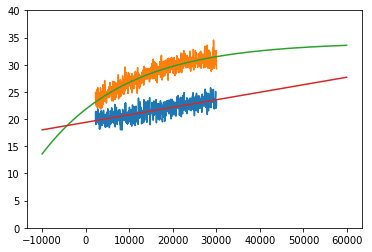

In [8]:
temperature_features, coefs = get_temperature_features(signal_cut_example)

print(temperature_features)
print(coefs)

plt.subplot(111)
plt.plot(signal_cut_example[0], signal_cut_example[5])
plt.plot(signal_cut_example[0], signal_cut_example[6])
more_time = np.arange(-10000, 60000, 100)
Tp_p = [exponent(x, coefs['k_p'], coefs['tao_p'], coefs['beta_p']) for x in more_time]
Tm_p = [exponent(x, coefs['k_m'], coefs['tao_m'], coefs['beta_m']) for x in more_time]
plt.plot(more_time, Tp_p)
plt.plot(more_time, Tm_p)
plt.ylim(0, 40)
plt.show()

# saving for paper writing
temperature_measure = np.array([signal_cut_example[0], signal_cut_example[5], signal_cut_example[6]])
temperature_predict = np.array([more_time, Tp_p, Tm_p])
np.savetxt("tmp/temperature_measure_%s.csv" % (example_idx), temperature_measure.transpose(), delimiter=',')
np.savetxt("tmp/temperature_predict_%s.csv" % (example_idx), temperature_predict.transpose(), delimiter=',')